# Projeto 2 - Ciência dos dados

#### Nomes: Pedro Henrique Britto Aragão Andrade, Letícia Teles Machado, Thiago Shiguero Kawahara

In [25]:
# Pergunta: A partir de determinadas informações, prever se um chocolate recebe um rating de 3.5 para cima ou não

In [26]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Abrindo o dataset

dados_cru= pd.read_csv("chocolate.csv")
dados_cru

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [28]:
# Faz a contagem de células vazias de cada coluna

dados_cru.isnull().sum()

Unnamed: 0                             0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [29]:
# Há informações irrelevantes para o nosso tema no dataset, por isso as retiramos.

# Filtrando as colunas

dados= dados_cru.iloc[:, [8, 5, 7, 3, 9, 11, 12, 13, 17]]

In [30]:
# Ajeitando a coluna rating para o nosso interesse

dados.loc[dados.rating<3.5, "rating"]= 0
dados.loc[dados.rating>=3.5, "rating"]= 1

In [31]:
# Traduzindo o dataset para o português.

# Renomeando as colunas

dados= dados.rename(columns= {"company": "cia", "company_location": "local_cia", "country_of_bean_origin": "país_grão",
                      "cocoa_percent": "%cacau", "counts_of_ingredients": "num_ingr", "cocoa_butter": "manteiga_cacau",
                      "vanilla": "baunilha", "lecithin": "lecitina", "first_taste": "1_sabor", "second_taste": "2_sabor"})

In [32]:
# local_cia

dados.local_cia.value_counts()

U.S.A                    948
France                   167
Canada                   158
U.k.                     117
Italy                     67
                        ... 
Martinique                 1
Wales                      1
Suriname                   1
Ghana                      1
St.vincent-grenadines      1
Name: local_cia, Length: 66, dtype: int64

In [33]:
# Pelo value_counts percebemos que há uma grande discrêpancia de quantidade de chocolates dos U.S.A. e do resto do mundo e
# também existe uma larga variedade de países, com 66 no total.
# Portanto classificamos a coluna local_cia em ser U.S.A. ou não.

dados.loc[dados.local_cia!= "U.S.A", "local_cia"]= 0
dados.loc[dados.local_cia== "U.S.A", "local_cia"]= 1

In [34]:
# país_grão

dados.país_grão.value_counts().head(10)

Venezuela             238
Peru                  207
Dominican republic    200
Ecuador               194
Madagascar            157
Blend                 140
Nicaragua              92
Brazil                 74
Bolivia                71
Belize                 65
Name: país_grão, dtype: int64

In [35]:
# Pelo value_counts percebemos que há uma grande concentração de grãos originários dos países da América Latina, então 
# categorizamos a coluna em pertencente a América Latina ou não.

# dicionario para categorizar os países dos grãos em pertencentes da América Latina ou não

dicio2= {
    
    0: ['Madagascar','Dominican republic','Tanzania','Papua new guinea','Burma','Togo','Sao tome','Fiji','Vanuatu','Indonesia',
        'Trinidad','Vietnam','Ghana','Blend','Grenada','Jamaica','India','Congo','Philippines','Solomon islands','Uganda',
        'Malaysia','Sri lanka','Ivory coast','Gabon','Taiwan','St. lucia','Australia','Liberia','Sierra leone','Nigeria',
        'U.s.a.','St.vincent-grenadines','Thailand','Tobago','Sumatra','Cameroon','Samoa','Sao tome & principe','Principe',
        'Sulawesi','Dr congo'],
    
    1: ['Peru','Bolivia','Venezuela','Ecuador','Brazil','Panama','Colombia','Cuba','Mexico','Nicaragua','Belize','Guatemala',
         'Costa rica','Honduras','Haiti','Puerto rico','Martinique','Bolvia','El salvador','Suriname']
}

# Substituindo os países dos grãos pelas suas categorias

for i in list(dados["país_grão"]):
    if i in dicio2[1]:
        dados.loc[dados["país_grão"]==i,"país_grão"]= 1
    elif i in dicio2[0]:
        dados.loc[dados["país_grão"]==i,"país_grão"]= 0

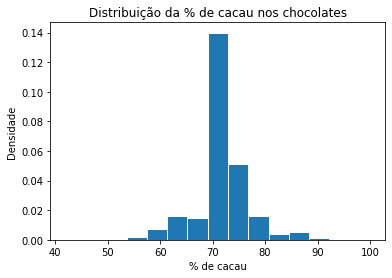

In [36]:
# %cacau

plt.hist(dados["%cacau"], bins=15, density=True, edgecolor= "white")
plt.title("Distribuição da % de cacau nos chocolates")
plt.ylabel("Densidade")
plt.xlabel("% de cacau");

In [37]:
# Pelo histograma percebesse que há uma grande concentração de chocolates com 70% de cacau, então categorizamos a coluna
# %cacau em porcentagem de cacau igual a 70 ou não.

dados.loc[dados["%cacau"]!= 70, "%cacau"]= 0
dados.loc[dados["%cacau"]== 70, "%cacau"]= 1

In [38]:
# Renomeando as linhas de manteiga_cacau, baunilha, lecitina

dados.loc[dados.manteiga_cacau== "have_cocoa_butter", "manteiga_cacau"]= 1
dados.loc[dados.manteiga_cacau== "have_not_cocoa_butter", "manteiga_cacau"]= 0

dados.loc[dados.baunilha== "have_not_vanila", "baunilha"]= 0
dados.loc[dados.baunilha== "have_vanila", "baunilha"]= 1

dados.loc[dados.lecitina== "have_not_lecithin", "lecitina"]= 0
dados.loc[dados.lecitina== "have_lecithin", "lecitina"]= 1

In [39]:
# 1_sabor

dados["1_sabor"].value_counts()

creamy                   160
sandy                    128
intense                   81
nutty                     76
fatty                     74
                        ... 
black current              1
full flavor spectrum       1
ligt color                 1
subtle but refreshing      1
palm                       1
Name: 1_sabor, Length: 456, dtype: int64

In [40]:
# Pelo value_counts percebemos que não há uma grande concentração em apenas alguns sabores e que existe uma grande variedade
# de sabores (456 no total).
# Portanto categorizamos os sabores em doce, amargo, salgado, acido, arenoso, gorduroso e complexo.

# dicionario para categorizar os primeiros sabores

dicio = {
    
 'doce': ['fruity','sweet','mild fruit','brief fruit note','yellow fruit','hot cocoa','strawberry','red wine','creamy',
          'fruity with coffee notes','vanilla','very sweet','floral','dark berry','cashew','subtle','dried fruit','smooth',
          'melon','marshmallow','strawberries','grapes','bland','raspberry','strong vanilla','caramel','intense floral','gummy',
          'cinamon and nutmeg','mocha','intense marshmallow','chocolate covered cherries','red berry','sweet grass','mellow',
          'bright fruit','ripe grapes','dairy','perfume','overly sweet','sugar dominates','mild','berry','true to sugar',
          'banana','deep cherry','licorice','cherry','brownie','sweet spice','raisins','mild cherry','cinamon','intense fruit',
          'mild fruit and spice','tropical berry','blackberry','dark forest berry','caramel and cocoa','candy like off flavor',
          'blackberry and cinnamon','ultra fruity','brownine','fruit','prominent plum note','malitol','plums','coconut','fig',
          'honey','choco covered strawberry','tea','chocolate covered banana','blackberries','strong fruit','red fruit',
          'mild strawberry','sweet edge','sl. sweet','light perfume','overyly sweet','strong floral','too sweet','mild caramel',
          'candy','candy like','candy-like','mild vanilla and mild fruit','strong raspberry','spoiled milk',
          'intense mocha flavor','raisiny','intense vanilla','grape','grapefruit','tropical fruit and mild smoke',
          'candy spices','wine','cocounut','Fruity','notes from sugar','intense grapes','peanut butter','maple','rubbery',
          'simple red berry','berry notes with sweet edge','bright red fruit','fudgey','intense plum','refined','Easter candy',
          'rich brownie','intense fruity','bold cherry','light brown','ligt color','apple','subtle red berry','cranberries',
          'pronounced berry','robust dark tropical fruit','dried fig','berries','pronounced fruit','roasted strawberry',
          'intense sweet','yogurt','mellow fruit','intense prune and berry'],
 
 'amargo': ['cocoa','rich cocoa','mild tobacco','burnt rubber','burnt wood','cocoa and powerful tang','gritty','woody','rich',
            'high roast','smokey','coffee','light roast','bitter','appealing smoke','smoke','burn butterscotch','sl. bitter',
            'leather','base cocoa','tobacco','dark cocoa','bitter then nutty rustic','mild bitter','heavy roast','mild smoke',
            'base cocoa w/ palm notes','over roasted','assertive','high astringent','mild cocoa','deep cocoa','burnt coffee',
            'burnt up front','med roast','dark roast','bold','basic cocoa','woodsy','coffee and cocoa','cocoa flavor dominates',
            'wood','dark woody','dark coffee','burnt honey','late cocoa','intense cocoa','low refinement',
            'dominated by heavy roast','slightly burnt','mild smoke and fruit','cocoa and fresh grapes','mildly burnt caramel',
            'strong cocoa','black current','cocoa and coconut','mild woody','mildly rich','XL nibs','rich chocolate',
            'harsh flavor','ashey','full bodied','slight burnt','harsh burnt','strong','watered down coffee','roasty/smokey',
            'bitter coffee flavor','rough','overly intense','strong base cocoa','intensely smokey','burnt caramel',
            'mild smokey','intense smoke','smoke dominates','large nibs','deep','cocoa base','fresh nibs',
            'strong smokey tobacco','full cocoa flavor','cigar','mild cacao and fruit notes','black tea','basic chocolate',
            'burnt black licorice','dark color','pure','roasty cocoa','slight bitter','nutty and bitter dominate',
            'cocoa dominates','rich base cocoa','heavy smoke','toffee','hint of smoke'],
 
 'salgado': ['vegetal','green','nutty','roasty','herbal','hay','cardboard','nut','slight roasty','nuts','herbs','ham-like',
             'nutmeg','roasted nuts','bready','strong nutty with off notes','raw','banana nut','cucumber','carrots','hazelnut',
             'grits','large grits','few grits','olive','intense olive','baked bread','cheesy off flavor','mild nutty','palm',
             'cardamon','peanut','medium roast','anise','mild hammy','musty','vegetable and honey','grass','mildy nutty',
             'burnt nuts','tannic','smoked ham','ham','walnuts','baked','mild nutty and fruit','strong malt','salt noticeable',
             'strong nutty'],
 
 'acido': ['orange','spicy and candy-like','strong pepper','citrus','spicy','spice','hot spice','strong spice','tart',
           'sour fruit','spicey','black pepper and banana','blackpepper','black pepper','high acidity','sour',
           'subtle but refreshing','distinct lemon','sour milk','acidic','mild metallic and spice','slightly metallic',
           'intense orange','lemon','ripe orange','green apple','mild mint','metallic','mild spice','smoth','sour off flavor',
           'sour grapes','very sour','very spicy','pungent','pungent raisin','high acid','sour raisin','mild metallic',
           'oranges','aluminum','spicy and fragrant','chemical','rum','tangy','sour fig','intense spice','savory','vinegar',
           'intense spicy','mild tart','metal','mint','sour palm','dominant spice','strong spicey','fudgey then spicy',
           'evolves black pepper to citrus','sticy','savory lemon','sour orange','spciy'],
 
 'arenoso': ['sandy','sliglty dry','harsh','grainy texture','unrefined','grit','dry','powdery','grainy','chalky','earthy',
             'muddy','grassy','slightly dry','roasty and under refined','dirt','off pungent','crumbly','sl. chalky','dirty',
             'intense earthy','sl. dry','sandpaper','slight dry','mostly earthy','very sandy','potting soil','mild earthy',
             'soil','slight grainy'],
 
 'gorduroso': ['oily','sticky','fatty','waxy','waxy mouthfeel','chewy','molasses','pastey','pungent off flavor','silky',
               'cloying','klingy','oily surface','butter','nice melt','molasses notes from sugar','buttery','mild fatty',
               'mild molasses','rubber','butterscotch','molassses','clingy','molasses undertone'],
 
 'complexo': ['delicate','astringent','mild profile','alluring aroma','intense','basic','balanced','long lasting','off aroma',
              'long','coarse','complex','unbalanced','chunky','smooth texture','rustic','robust','off','flat','simple',
              'light color','distinct','off notes','soapy','slow','short','harsh aroma','hammy','muted','texture issues',
              'one dimensional','well defined','near perfect shine','dates','intens','very coarse','slow develop',
              'unique flavor','accessible','poor texture','dutched?','full flavor spectrum','fungal','off note','poor finish',
              'well balanced','multiple off flavors','uneven','accesible','non descript','single note','swiss miss','dense',
              'subdued','dominant savory','strong rubber','thick','uneven melt','sharp','slow to develop','super temper','dull',
              'modest']
}

# Substituindo os sabores pelas suas categorias

for i in list(dados["1_sabor"]):
    if i in dicio["doce"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "doce"
    elif i in dicio["amargo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "amargo"
    elif i in dicio["salgado"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "salgado"
    elif i in dicio["acido"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "acido"
    elif i in dicio["arenoso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "arenoso"
    elif i in dicio["gorduroso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "gorduroso"
    elif i in dicio["complexo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "complexo"

In [41]:
# Dataframe que iremos trabalhar

dados

,rating,país_grão,%cacau,local_cia,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor
0,1.0,0,0.0,1,3,1,0,0,amargo
1,1.0,0,0.0,1,3,1,0,0,amargo
2,0.0,0,0.0,1,3,1,0,0,amargo
3,1.0,1,0.0,0,4,1,0,1,doce
4,1.0,1,1.0,0,4,1,0,1,salgado
...,...,...,...,...,...,...,...,...,...
2219,0.0,0,0.0,0,4,1,0,0,gorduroso
2220,1.0,1,0.0,0,3,1,0,0,salgado
2221,1.0,1,0.0,0,3,1,0,0,complexo
2222,0.0,0,1.0,0,3,1,0,0,gorduroso


1º Coluna (local_cia)- Localização da companhia (1-E.U.A. ou 0-não) $\Rightarrow$ qualitativa

2º Coluna (país_grão)- País de origem do grão (1-América Latina ou 0-não) $\Rightarrow$ qualitativa

3º Coluna (%cacau)- Porcentagem de cacau (1-70% ou 0-outra%) $\Rightarrow$ quantitativa

4º Coluna (rating)- Avaliação de 0 a 4 (1-≥3 ou 0-<3) $\Rightarrow$ qualitativa 

5º Coluna (num_ingr)- Número de ingredientes (1, 2, 3, 4, 5 ou 6) $\Rightarrow$ quantitativo

6º Coluna (manteiga_cacau)- Se possui manteiga de cacau (1-tem ou 0-não tem) $\Rightarrow$ qualitativa

7º Coluna (baunilha)- Se possui baunilha (1-tem ou 0-não tem) $\Rightarrow$ qualitativa

8º Coluna (lecitina)- Se possui leticina (1-tem ou 0-não tem) $\Rightarrow$ qualitativa

9º Coluna (1_sabor)- Primeiro sabor (doce, amargo, salgado, acido, arenoso, gorduroso ou complexo) $\Rightarrow$ qualitativa

In [42]:
# Faz a contagem de células vazias de cada coluna

dados.isnull().sum()

rating            0
país_grão         0
%cacau            0
local_cia         0
num_ingr          0
manteiga_cacau    0
baunilha          0
lecitina          0
1_sabor           0
dtype: int64

-------------------
## Análise exploratória

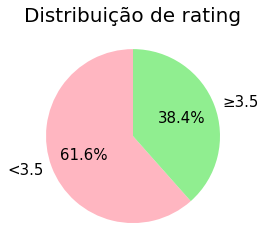

In [43]:
# rating

a = dados["rating"].value_counts()
plt.pie(a, autopct='%.1f%%',  textprops={'fontsize': 15}, startangle=90, labels=["<3.5","≥3.5"], 
        colors=['lightpink', 'lightgreen'])
plt.title("Distribuição de rating", fontsize=20);

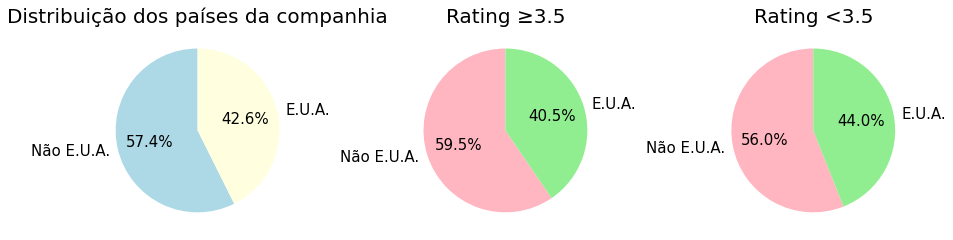

In [44]:
# local_cia

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["local_cia"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Não E.U.A.","E.U.A."],
        colors=['lightblue', 'lightyellow'])
plt.title("Distribuição dos países da companhia", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"local_cia"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Não E.U.A.","E.U.A."],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"local_cia"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Não E.U.A.","E.U.A."],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

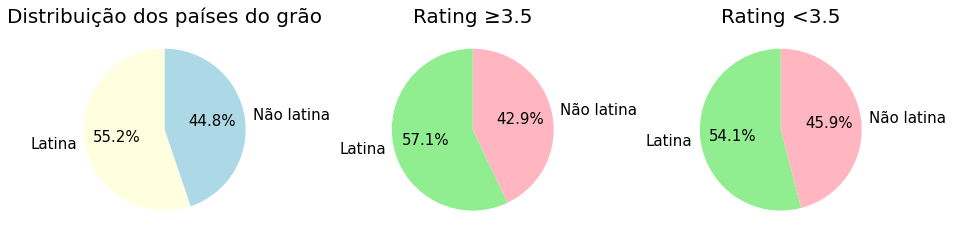

In [45]:
# país_grão

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["país_grão"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Latina", "Não latina"],
        colors=['lightyellow', 'lightblue'])
plt.title("Distribuição dos países do grão", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"país_grão"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Latina", "Não latina"],
        colors=['lightgreen', 'lightpink'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"país_grão"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["Latina", "Não latina"],
        colors=['lightgreen', 'lightpink'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

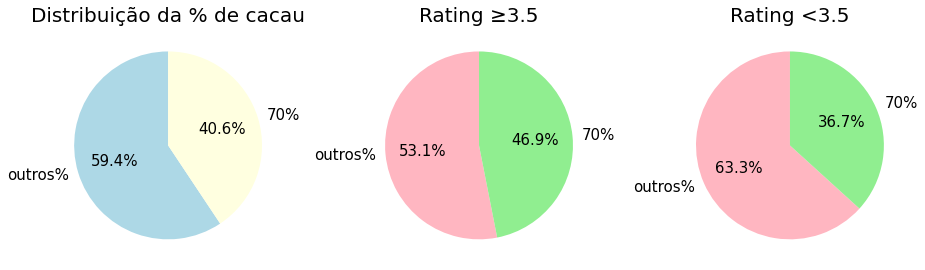

In [46]:
# %cacau

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["%cacau"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["outros%", "70%"],
        colors=['lightblue', 'lightyellow'])
plt.title("Distribuição da % de cacau", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"%cacau"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["outros%", "70%"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"%cacau"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["outros%", "70%"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

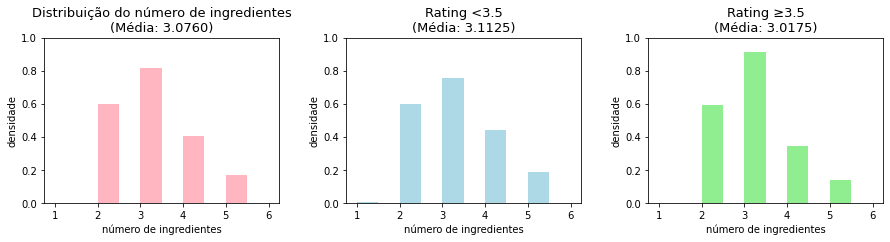

In [47]:
# num_ingr 

plt.figure(figsize=(13,4))

plt.subplot(131)
media = dados.loc[:,"num_ingr"]
plt.hist(dados.loc[:,"num_ingr"],bins=10,density=True,color="lightpink")
plt.title(f"Distribuição do número de ingredientes\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10);

plt.subplot(132)
media = dados.loc[dados.rating==0,"num_ingr"]
plt.hist(dados.loc[dados.rating==0,"num_ingr"],bins=10,density=True,color="lightblue")
plt.title(f"Rating <3.5\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10)

plt.subplot(133)
media = dados.loc[dados.rating==1,"num_ingr"]
plt.hist(dados.loc[dados.rating==1,"num_ingr"],bins=10,density=True,color="lightgreen")
plt.title(f"Rating ≥3.5\n(Média: {media.mean():.4f})", fontsize=13)
plt.xticks([1, 2, 3, 4, 5, 6],fontsize=10)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel("número de ingredientes",fontsize=10)
plt.ylabel("densidade",fontsize=10)

plt.tight_layout(pad=3)
plt.show()

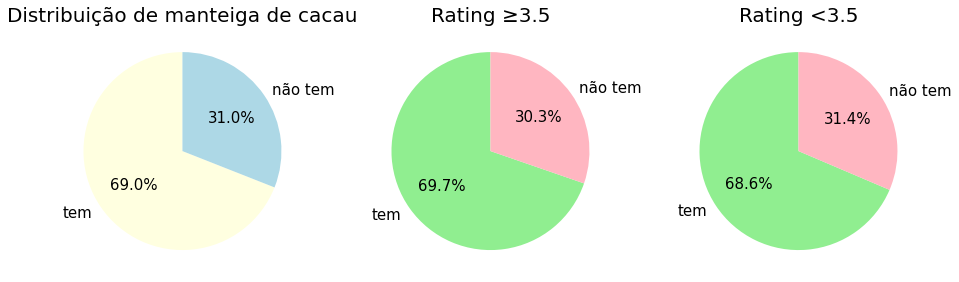

In [48]:
# manteiga_cacau

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["manteiga_cacau"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["tem", "não tem"],
        colors=['lightyellow', 'lightblue'])
plt.title("Distribuição de manteiga de cacau", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"manteiga_cacau"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["tem", "não tem"],
        colors=['lightgreen', 'lightpink'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"manteiga_cacau"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["tem", "não tem"],
        colors=['lightgreen', 'lightpink'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

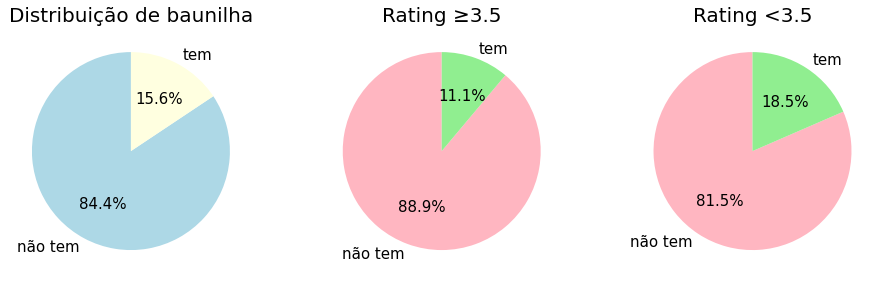

In [49]:
# baunilha

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["baunilha"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightblue', 'lightyellow'])
plt.title("Distribuição de baunilha", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"baunilha"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"baunilha"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

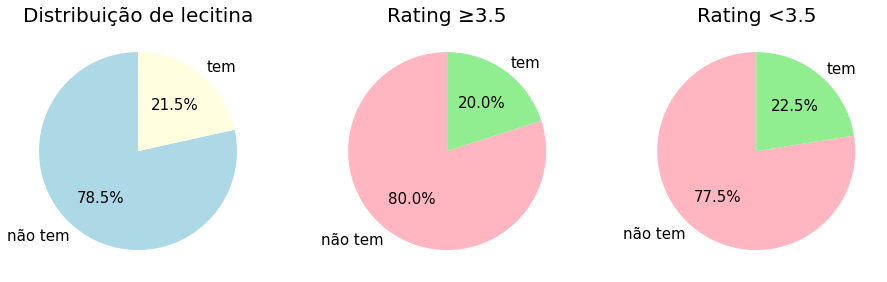

In [50]:
# lecitina

plt.figure(figsize=(13,4))

plt.subplot(131)
a = dados["lecitina"].value_counts()
plt.pie(a, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightblue', 'lightyellow'])
plt.title("Distribuição de lecitina", fontsize=20)

plt.subplot(132)
b = dados.loc[dados.rating==1,"lecitina"].value_counts()
plt.pie(b, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating ≥3.5", fontsize=20)

plt.subplot(133)
c = dados.loc[dados.rating==0,"lecitina"].value_counts()
plt.pie(c, autopct='%.1f%%', textprops={'fontsize': 15},startangle=90, labels=["não tem", "tem"],
        colors=['lightpink', 'lightgreen'])
plt.title("Rating <3.5", fontsize=20)

plt.tight_layout();

In [51]:
# 1_sabor

pd.crosstab(dados.rating, dados["1_sabor"], margins=True, normalize="index").round(4)*100

1_sabor,acido,amargo,arenoso,complexo,doce,gorduroso,salgado
rating,,,,,,,
0.0,7.89,14.76,18.41,11.47,23.45,14.17,9.86
1.0,9.59,14.27,7.37,13.68,37.78,8.07,9.24
All,8.54,14.57,14.16,12.32,28.96,11.83,9.62


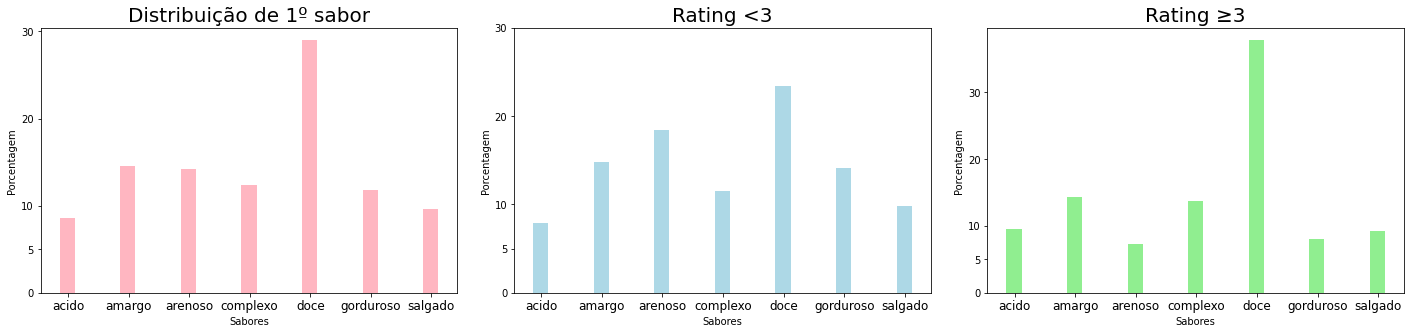

In [52]:
l= [[8.54,14.57,14.16,12.32,28.96,11.83,9.62],
    [7.89,14.76,18.41,11.47,23.45,14.17,9.86],
    [9.59,14.27,7.37,13.68,37.78,8.07,9.24]
   ]

plt.figure(figsize=(20,5))

plt.subplot(131)
largura = 0.25
c = np.arange(len(l[0]))
plt.bar(c, l[0], color="lightpink", width=largura)
plt.xticks([i+0.01 for i in range(len(l[0]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Distribuição de 1º sabor",fontsize=20)

plt.subplot(132)
largura = 0.25
c = np.arange(len(l[1]))
plt.bar(c, l[1], color="lightblue", width=largura)
plt.xticks([i+0.01 for i in range(len(l[1]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Rating <3",fontsize=20)

plt.subplot(133)
largura = 0.25
c = np.arange(len(l[2]))
plt.bar(c, l[2], color="lightgreen", width=largura)
plt.xticks([i+0.01 for i in range(len(l[2]))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"]
           ,fontsize=12)
plt.yticks([0,5,10,20,30])
plt.xlabel("Sabores")
plt.ylabel("Porcentagem")
plt.title(f"Rating ≥3",fontsize=20)

plt.tight_layout(pad=2) ;

-------------------------------

## Decision  Tree

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF

http://professorluizalberto.com.br/site/images/2020-1/Python%20%C3%81rvore%20de%20Decis%C3%A3o.pdf

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
dados2=pd.get_dummies(data=dados,columns=["1_sabor"])
dados2

,rating,país_grão,%cacau,local_cia,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor_acido,1_sabor_amargo,1_sabor_arenoso,1_sabor_complexo,1_sabor_doce,1_sabor_gorduroso,1_sabor_salgado
0,1.0,0,0.0,1,3,1,0,0,0,1,0,0,0,0,0
1,1.0,0,0.0,1,3,1,0,0,0,1,0,0,0,0,0
2,0.0,0,0.0,1,3,1,0,0,0,1,0,0,0,0,0
3,1.0,1,0.0,0,4,1,0,1,0,0,0,0,1,0,0
4,1.0,1,1.0,0,4,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0.0,0,0.0,0,4,1,0,0,0,0,0,0,0,1,0
2220,1.0,1,0.0,0,3,1,0,0,0,0,0,0,0,0,1
2221,1.0,1,0.0,0,3,1,0,0,0,0,0,1,0,0,0
2222,0.0,0,1.0,0,3,1,0,0,0,0,0,0,0,1,0


In [55]:
feature = ['local_cia', 'país_grão', '%cacau', 'num_ingr','manteiga_cacau', 'baunilha', 'lecitina', '1_sabor_acido',
       '1_sabor_amargo', '1_sabor_arenoso', '1_sabor_complexo', '1_sabor_doce','1_sabor_gorduroso', '1_sabor_salgado']
x = dados2[feature]
y = dados2.rating

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [57]:
clf = DecisionTreeClassifier()
clf2 = clf.fit(x_train, y_train)
y_pred=clf2.predict(x_test)

In [58]:
print(f"Accuracy: {round((metrics.accuracy_score(y_test, y_pred)*100), 2)}%")

Accuracy: 61.68%


In [59]:
importancia = pd.Series(clf.feature_importances_, index=feature).sort_values(ascending=False).round(5)*100
importancia

num_ingr             14.829
local_cia            11.870
1_sabor_doce         11.448
país_grão            10.207
%cacau                9.985
lecitina              7.451
1_sabor_arenoso       6.756
manteiga_cacau        6.119
baunilha              4.332
1_sabor_gorduroso     4.068
1_sabor_amargo        3.949
1_sabor_complexo      3.918
1_sabor_salgado       2.892
1_sabor_acido         2.176
dtype: float64

# Random forest classifier
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [100]:
feature = ['local_cia', 'país_grão', '%cacau', 'num_ingr','manteiga_cacau', 'baunilha', 'lecitina', '1_sabor_acido',
       '1_sabor_amargo', '1_sabor_arenoso', '1_sabor_complexo', '1_sabor_doce','1_sabor_gorduroso', '1_sabor_salgado']
X = dados2[feature]
Y = dados2.rating

In [102]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

In [103]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(Xtrain, ytrain)
Y_pred = classifier.predict(Xtest)

In [104]:
# Vendo a acuracia
print(f"Acuracia: {round(classifier.score(Xtest, ytest)*100,2)}%")

Acuracia: 62.13%


In [105]:
importancia = pd.Series(classifier.feature_importances_, index=feature).sort_values(ascending=False).round(5)*100
importancia

local_cia            13.745
num_ingr             13.457
país_grão            13.291
%cacau               11.884
1_sabor_doce          7.766
manteiga_cacau        5.710
1_sabor_arenoso       5.671
baunilha              5.321
lecitina              4.908
1_sabor_gorduroso     4.195
1_sabor_complexo      4.093
1_sabor_acido         3.690
1_sabor_amargo        3.149
1_sabor_salgado       3.120
dtype: float64